# Atividade 1 - Aprendizado de Máquina: modelos descritivos

**Professor: Sérgio Nery Simões**\
**Alunos:**
- Sandro Ricardo De Souza
- Leonardo 

**Data:26/03/2025**

A atividade consiste em replicar o notebooks neste [link](https://colab.research.google.com/drive/1vFRy6g0JPImsri8pItFqXypIU41uI-Bn#scrollTo=8XYcBbN3eI4v), executando cada célula, interpretando e explicando cada saída. Concluir sugerindo aplicações das metodologias aplicadas aqui na Secretaria de Educação do Espírito Santo.  



# Modelo de segmentação de clientes

Este notebook contém um exercício de clustering usado para praticar a interpretação de modelos de dados agrupados. A parte mais difícil de criar um modelo de clustering geralmente é entender os resultados que ele produz, pois não se tem uma variável de destino com a qual possa comparar seus resultados.

Portanto, a interpretação pode se tornar bastante complexa e, portanto, exploramos algumas alternativas para entender seus clusters depois de treinar seu modelo. Abaixo estão as etapas executadas para limpar os dados, explorá-los e, finalmente, ajustá-los a um modelo de agrupamento K-Means e interpretar os resultados.

A parte mais importante deste exercício é a interpretação do agrupamento, pois devemos estar cientes de que o objetivo final é fornecer insights de negócios por meio dos resultados.

## Importando módulos

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Lendo base de dados

In [21]:
path_file = r'../../datasets/segmentation_data.csv'
customer_info = pd.read_csv(path_file)
customer_info.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
49,100000050,1,1,28,1,122831,1,0
265,100000266,0,0,37,1,106215,1,0
1256,100001257,0,0,33,1,121890,1,1
1280,100001281,0,0,44,1,122292,0,1
1931,100001932,0,0,26,0,70336,0,0


In [22]:
customer_info.shape

(2000, 8)

## Dicionário de dados

| Variable | Data Type | Range | Description |
| --- | --- | --- | --- |
| ID | numerical | Integer | Shows a unique identificator of a customer. |
| Sex | categorical | {0,1} | Biological sex (gender) of a customer. 0 = male / 1 = female |
| Marital status | categorical | {0,1} | Marital status of a customer. 0 = single / 1 = non-single |
| Age | numerical | Integer | The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset (Min. age = 18 / Max. age = 78) |
| Education | categorical | {0,1,2,3} | Level of education of the customer. 0=no education / 1=high-school / 2=university / 3=graduate |
| Income | numerical | Real | Self-reported annual income in US dollars of the customer. |
| Occupation | categorical | {0,1,2} | Category of occupation of the customer. 0=unemployed / 1=employee/oficial / 2=management or self-employed |
| Settlement size | categorical | {0,1,2} | The size of the city that the customer lives in. 0=small / 1=mid-size / 2=big |

O dataset contém 2.000 registros e 8 colunas, sem valores nulos.

**Variáveis Numéricas:**
- ID (identificador único).
- Age (idade).
- Income (renda anual).

**Variáveis Categóricas:**
- Sex (0 = masculino, 1 = feminino).
- Marital status (0 = solteiro, 1 = casado/não solteiro).
- Education (0 = sem educação, 1 = ensino médio, 2 = universidade, 3 = pós-graduação).
- Occupation (0 = desempregado, 1 = empregado, 2 = gerente/autônomo).
- Settlement size (0 = cidade pequena, 1 = média, 2 = grande).

## Informações sobre o dataset

Análise estatística resumida dos dados. Verificação de valores nulos e estrutura geral dos dados, incluindo os tipos.

O método `.info()` para entender os tipos de dados em cada coluna. E o método `.describe()` para mostrar informações resumidas sobre as estatísticas regulares.

In [23]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [24]:
customer_info.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Melhorando a apresentação do `.describe`

In [25]:
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']
customer_info[cat_columns] = customer_info[cat_columns].astype('str')
customer_info.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


Na célua anterior, melhoramos a saída do describe para obtermos uma descrição mais acertiva. 

`num_columns = ['ID','Age','Income']`

criamos uma lista chamada num_columns contendo os nomes das colunas numéricas da base de dados. Essas colunas são:

- ID: identificador único do cliente (inteiro).
- Age: idade do cliente (inteiro).
- Income: renda anual do cliente (real).

`cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']`

criamos uma lista chamada `cat_columns` contendo os nomes das colunas categóricas. Essas colunas representam características como sexo, estado civil, nível de educação, ocupação e tamanho da cidade.

`customer_info[cat_columns] = customer_info[cat_columns].astype('str')`

Convertemos todas as colunas categóricas para o tipo string. Isso facilita a análise estatística com métodos como `.describe()`, pois o pandas trata strings como categorias de texto.

`customer_info.describe(include='object').T`

O método `.describe(include='object')` gera estatísticas descritivas apenas para colunas categóricas (strings). Ele retorna informações como:
- count: número de valores não nulos.
- unique: quantidade de categorias distintas.
- top: categoria mais frequente.
- freq: frequência da categoria mais comum.

Por fim, o `.T` (transposição) inverte linhas e colunas para uma visualização mais organizada.

## Valores faltantes

Podemos ver, pela saída do comando `.info()` que não há valores faltantes nos dados.

## Análise exploratória de dados

### Distribuição das variáveis numéricas

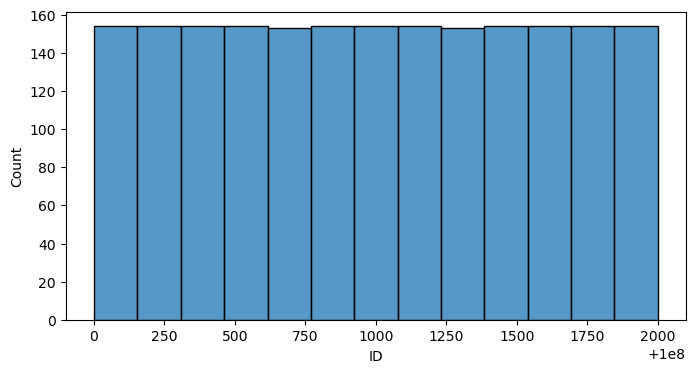

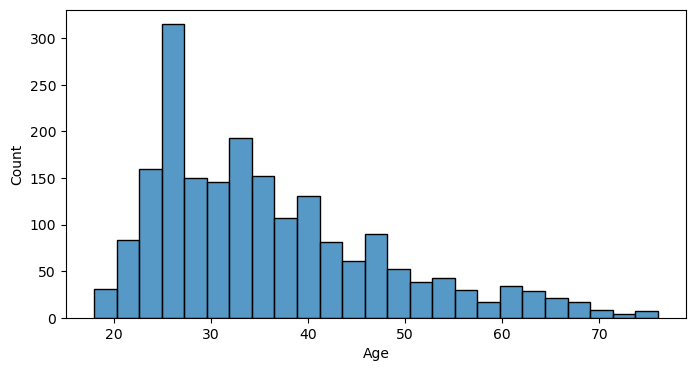

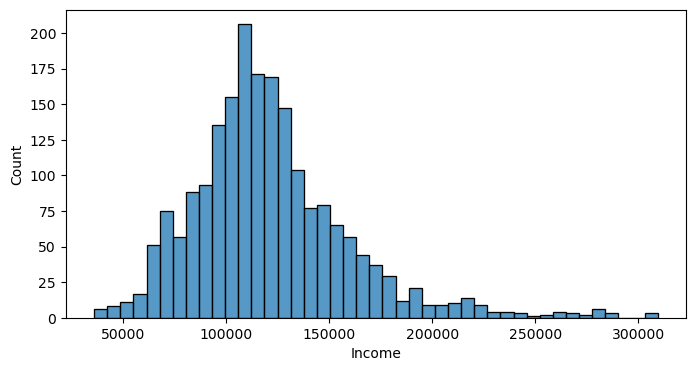

In [26]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=customer_info, x=numerical)

### Distribuição das variáveis numéricas Idade, ID e Renda.

Notamos que `ID` tem uma distribuição uniforme, o que faz sentido, já que é um identificador do cliente e será descartado abaixo.
A variável `Idade` tem uma forte assimetria à direita, gerada por causa do limite inferior em zero da variável. Se estivermos usando o agrupamento K-Means, não haverá necessidade de normalizar o atributo, mas talvez tenhamos que fazer isso para outros modelos. A variável `Renda` tem o mesmo problema de assimetria à direita que 'Idade'. Teremos que ter cuidado com isso, dependendo do modelo que selecionarmos.

### Distribuição das variáveis categóricas

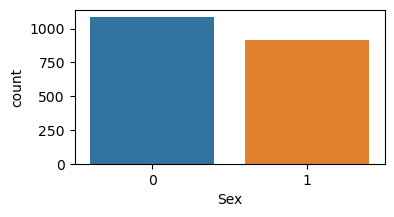

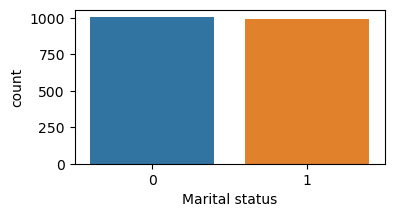

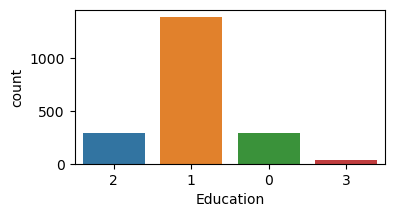

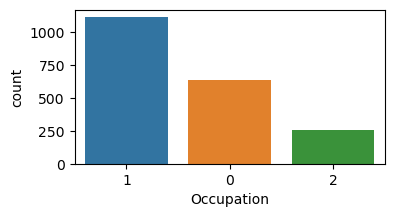

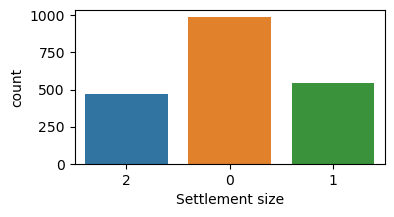

In [27]:
for category in cat_columns:
    plt.figure(figsize=(4,2))
    sns.countplot(data=customer_info, x=category, hue=category)

A análise das variáveis categóricas revelou que os gêneros e o estado civil dos clientes estão equilibrados. A maioria possui ensino médio, enquanto apenas 1,8% tem pós-graduação, sugerindo a fusão das categorias superiores em "universidade". Além disso, as categorias de ocupação e tamanho do assentamento apresentam uma distribuição adequada entre as opções.

### Análise bivariada
Uma análise bivariada é um tipo de análise estatística que examina a relação entre duas variáveis. O objetivo é entender se existe associação entre elas e como elas se comportam juntas. Dependendo do tipo de variáveis envolvidas (categóricas ou numéricas), diferentes técnicas podem ser utilizadas.

#### Características numéricas

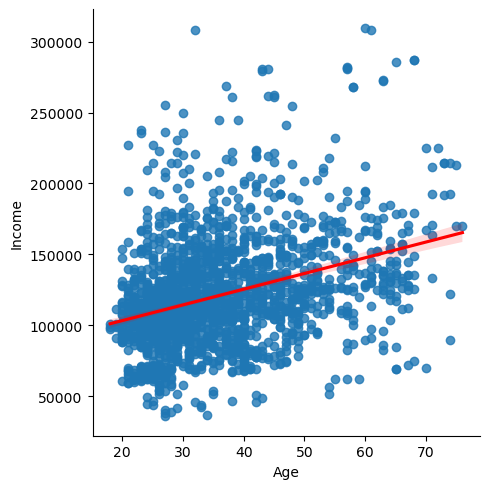

In [28]:
sns.lmplot(x='Age', y='Income',  line_kws={'color': 'red'},  data=customer_info)

Há uma pequena correlação entre as características Idade e Renda. Percebemos que a inclinação da linha é muito pequena, o que mostra que a correlação entre as características é baixa.

In [29]:
import scipy.stats as stats
print(stats.pearsonr(customer_info['Age'], customer_info['Income']))

PearsonRResult(statistic=0.34061016373173514, pvalue=1.6443825442386822e-55)


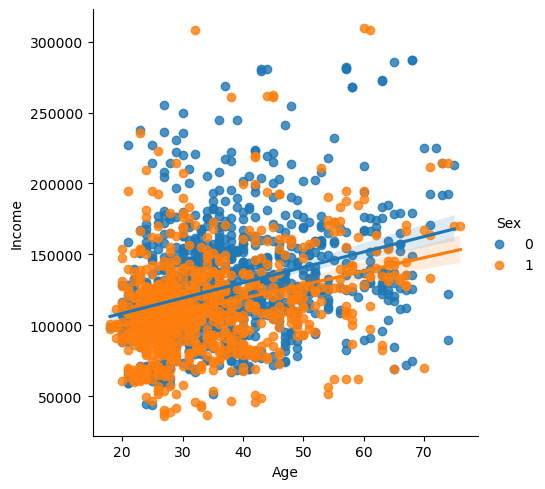

In [30]:
sns.lmplot(x='Age', y='Income', hue='Sex', data=customer_info)

Podemos ver o cálculo do fator de correlação de Pearson, que mostra que os valores têm uma pequena correlação entre eles. Plotando os dados segmentados por gênero, a correlação se mantem para ambos

#### Comparação entre variáveis categóricas e numéricas

In [31]:
cat_columns

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

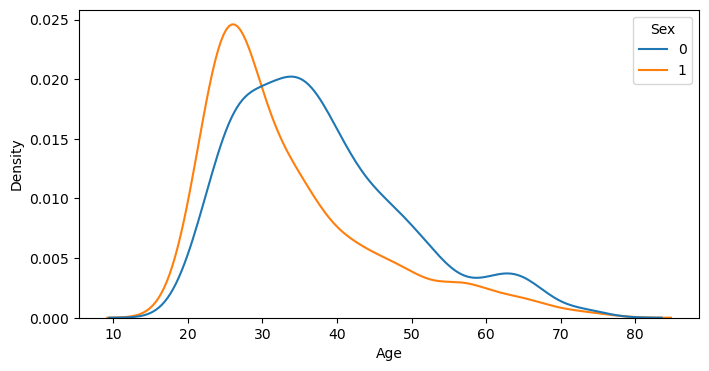

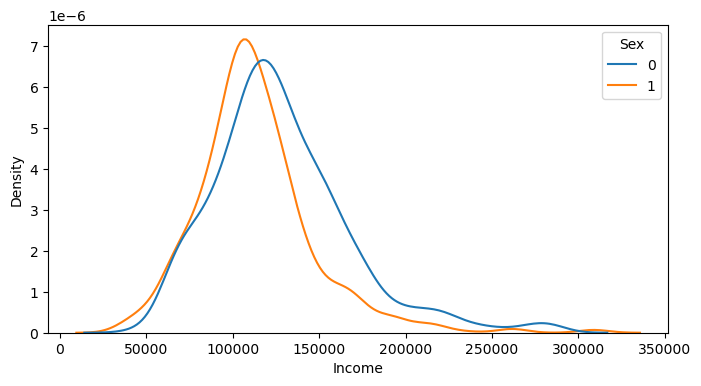

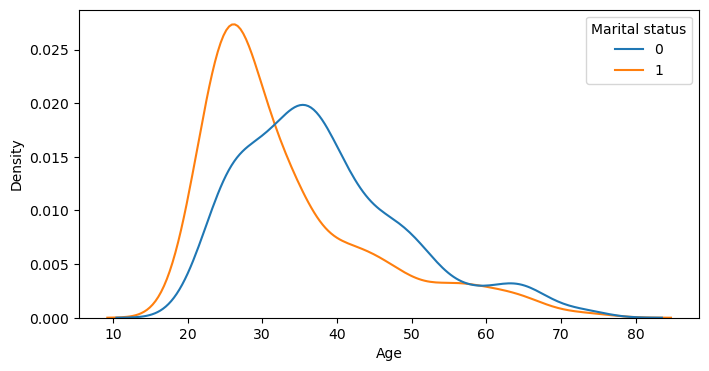

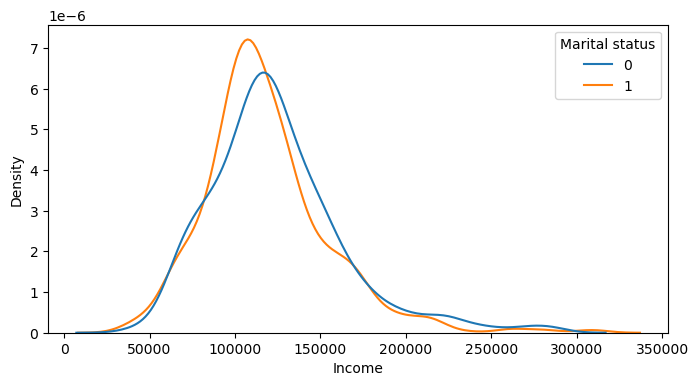

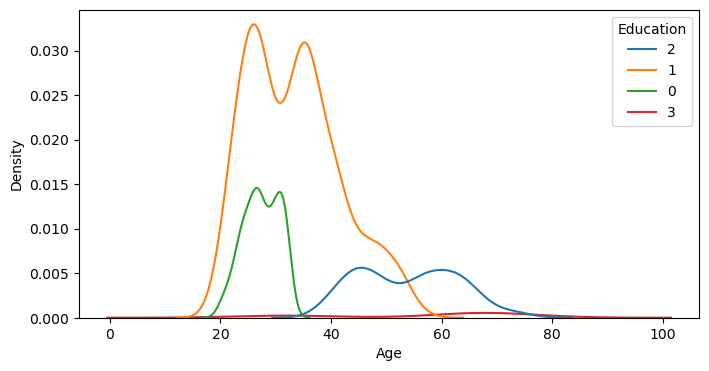

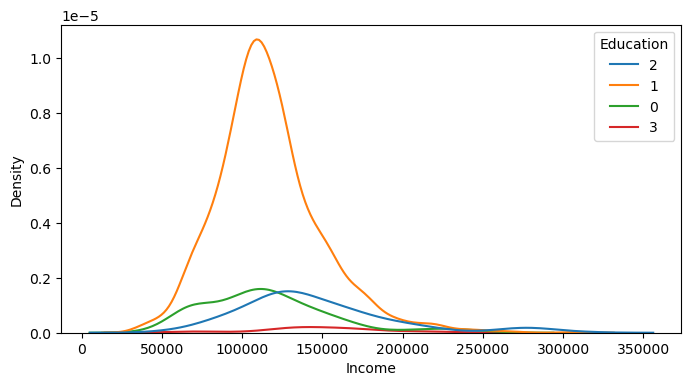

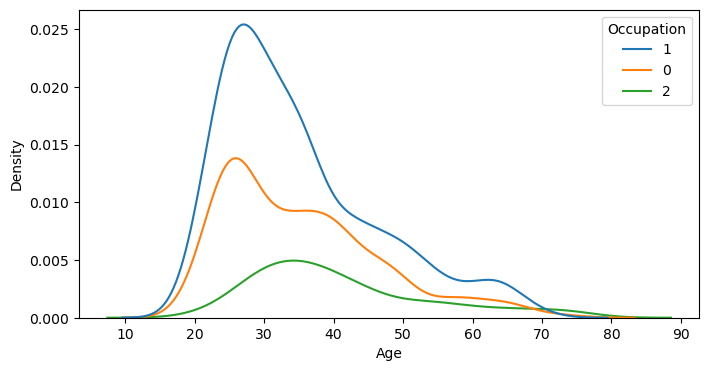

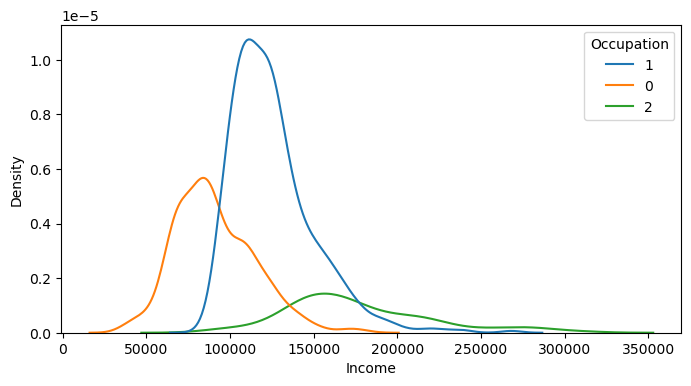

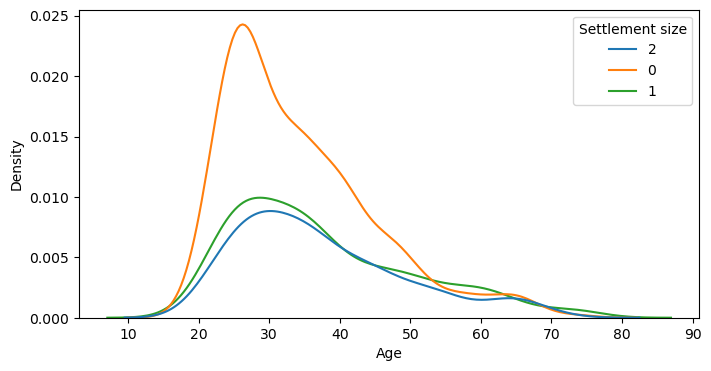

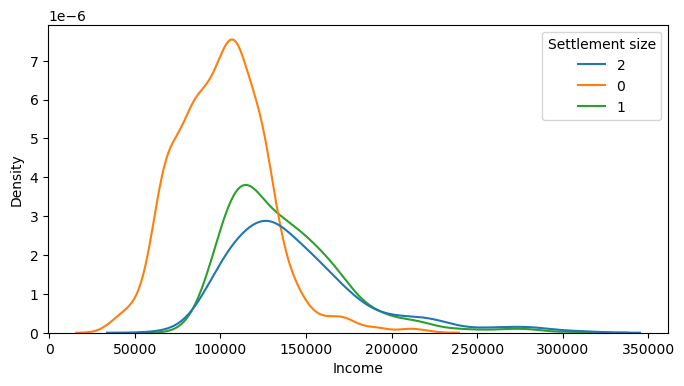

In [32]:
for category in cat_columns:
    for numerical in num_columns:
        if numerical != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=customer_info, x=numerical, hue=category) ## Non-normalized version of this plot by switching kdeplot for histplot

#### Análise dos gráficos de densidade
Os gráficos de densidade revelam algumas tendências importantes

1. Idade por categoria:
   - Pessoas casadas tendem a ser mais velhas do que as solteiras.
   - O nível educacional apresenta uma variação interessante com a idade: pessoas com maior educação tendem a estar em faixas etárias intermediárias.
   - Desempregados (ocupação = 0) tendem a estar distribuídos em faixas etárias mais altas e mais baixas, possivelmente jovens sem emprego fixo e aposentados.
2. Renda por categoria:
   - Homens parecem ter uma distribuição de renda mais elevada em relação às mulheres.
   - Pessoas casadas possuem uma distribuição de renda mais ampla, indicando maior variação.
   - O nível educacional tem uma forte correlação com a renda: níveis mais altos de educação tendem a gerar maior renda.
   - A ocupação impacta fortemente a renda, com os desempregados concentrados em faixas de menor rendimento.

#### Relação entre variáveis categóricas

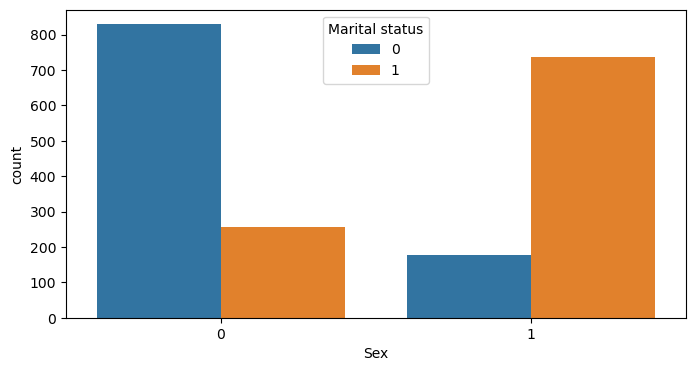

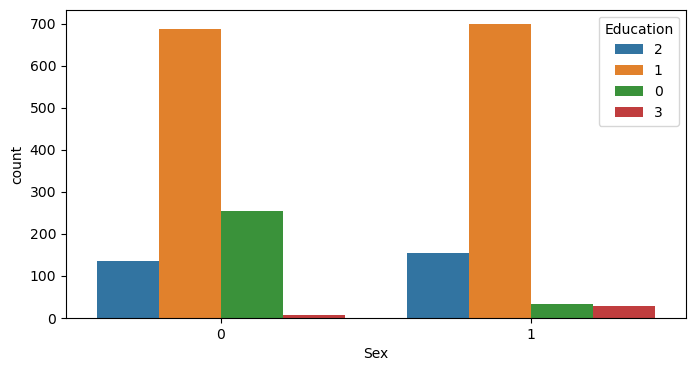

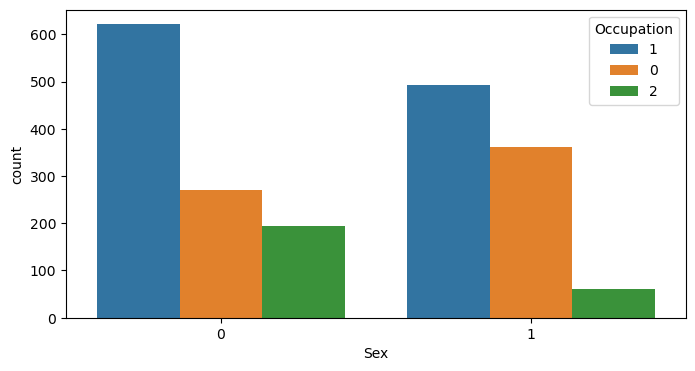

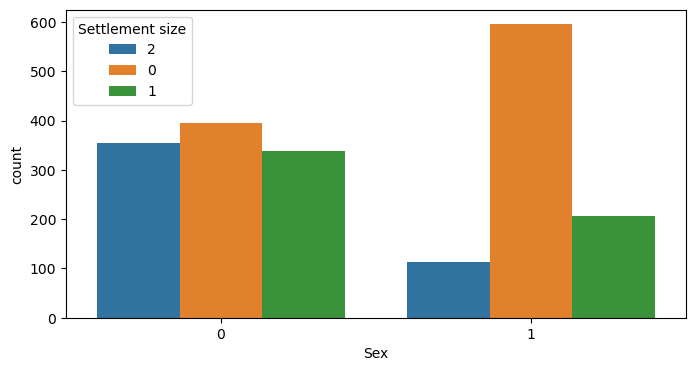

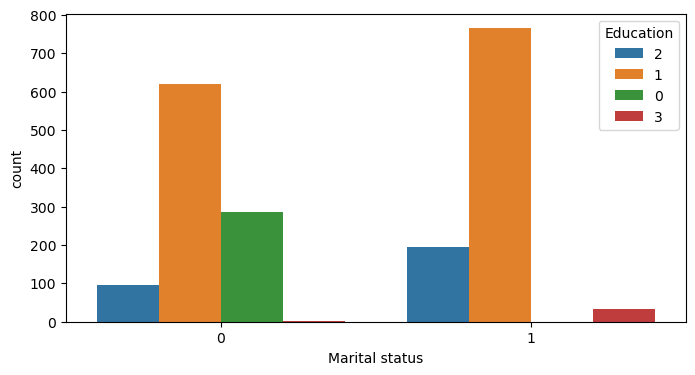

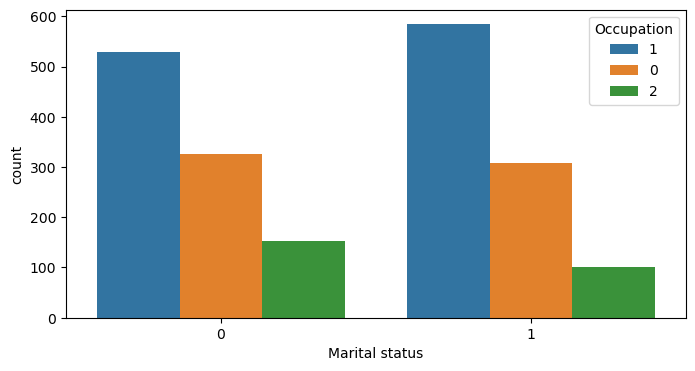

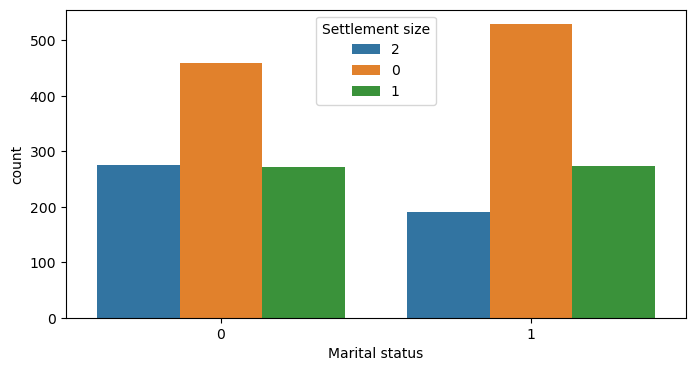

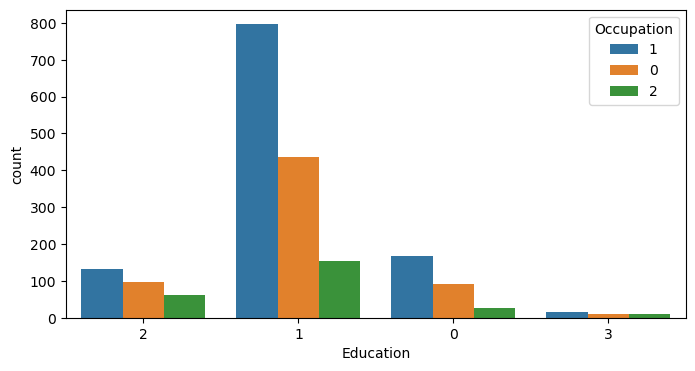

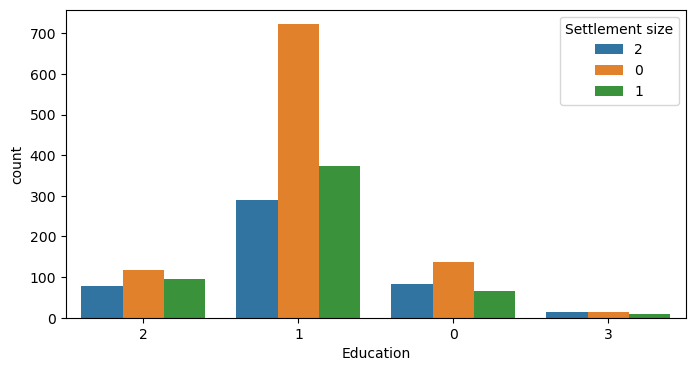

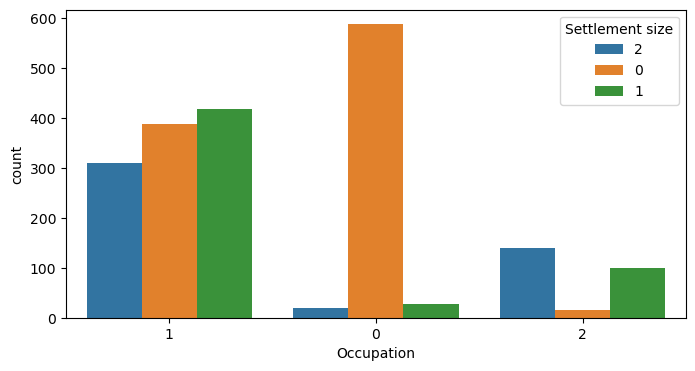

In [33]:
cat_aux = cat_columns.copy()
for category1 in cat_columns:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=customer_info, x=category1, hue=category2)

#### Análise dos gráficos de barra 
Os gráficos de contagem mostram algumas relações interessantes entre variáveis categóricas:

1. Sexo e Estado Civil:
    - Mulheres tendem a ser casadas com mais frequência do que homens.
    - Homens aparecem mais frequentemente na categoria de solteiros.
2. Estado Civil e Educação:
    - Pessoas casadas possuem uma maior concentração nos níveis médio e superior de educação.
3. Estado Civil e Tamanho da Cidade:
    - Pessoas casadas são mais comuns em cidades menores, enquanto solteiros são mais frequentes em áreas urbanas maiores.
4. Ocupação e Sexo:
    - Homens tendem a ser empregados com mais frequência do que mulheres.
    - Mulheres possuem uma maior proporção de desempregadas em comparação aos homens.

### Análise Multivariada
A análise multivariada é um conjunto de técnicas estatísticas utilizadas para examinar simultaneamente múltiplas variáveis e suas relações. Diferente da análise univariada, que estuda cada variável isoladamente, e da análise bivariada, que avalia a relação entre duas variáveis, a análise multivariada busca entender padrões mais complexos, considerando a interação entre três ou mais variáveis ao mesmo tempo.

In [34]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

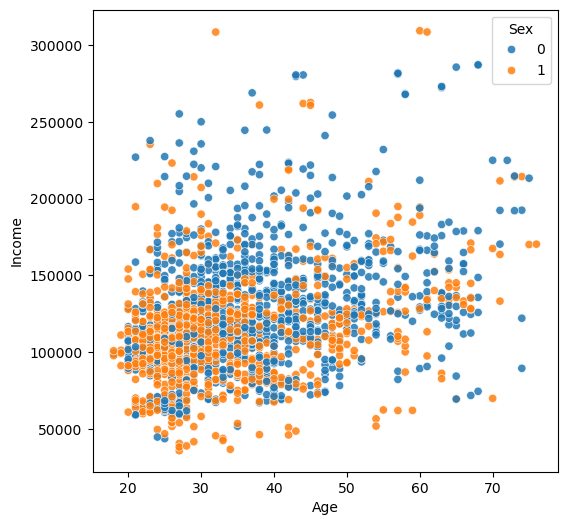

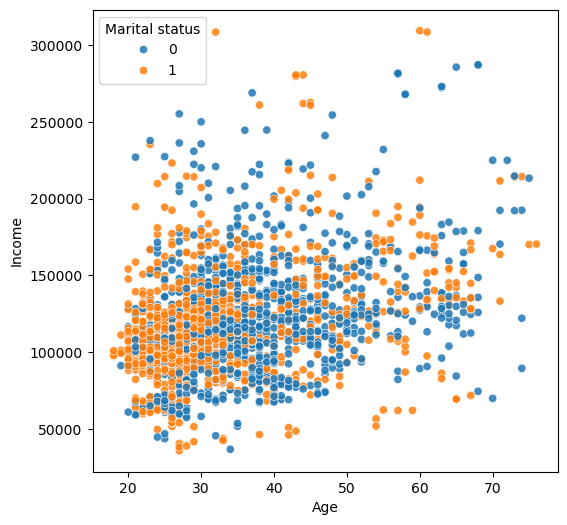

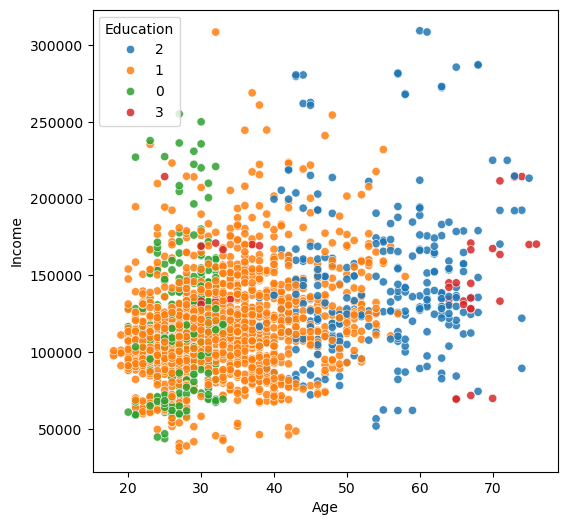

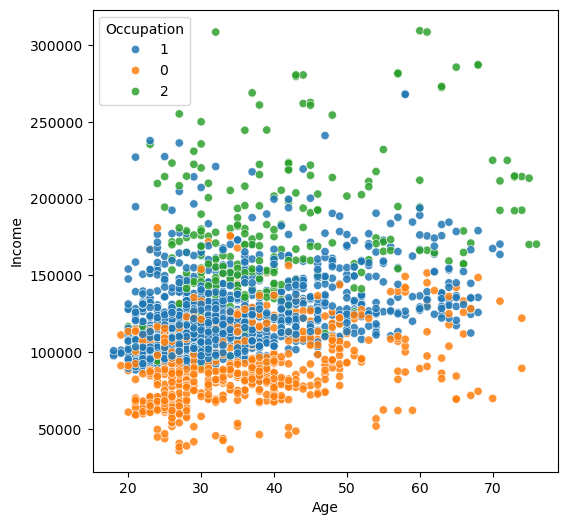

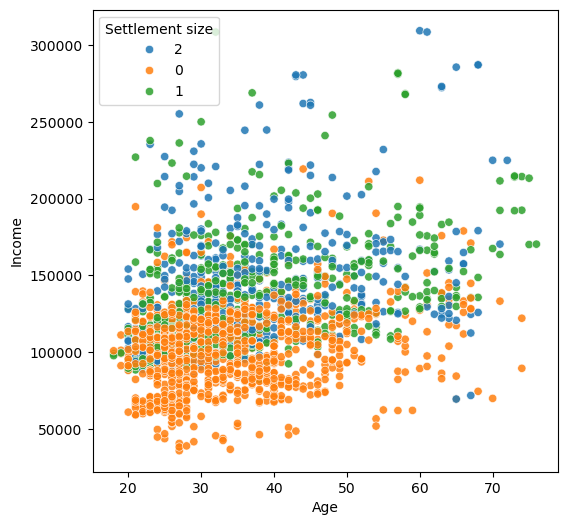

In [35]:
for cat in cat_columns:
    bivariate_scatter('Age', 'Income', cat, customer_info)

#### Análise dos Gráficos de Dispersão (Multivariada)
Os gráficos mostram a relação entre Idade e Renda, segmentada por diferentes variáveis categóricas:

1. Sexo:
   - Não há uma diferença significativa na distribuição de renda entre homens e mulheres.
   - Parece haver uma maior dispersão nos dados para ambos os sexos, indicando que a renda não depende fortemente do gênero.
2. Estado Civil:
    - Pessoas casadas parecem ter uma renda um pouco mais distribuída em faixas mais altas em relação aos solteiros.
    - Pode indicar que o casamento está correlacionado com maior estabilidade financeira.
3. Educação:
   - Níveis educacionais mais altos tendem a estar associados a maiores rendas.
   - Há uma maior concentração de pessoas com menor renda nos níveis de educação mais baixos.
4. Ocupação:
   - Pessoas desempregadas tendem a ter uma renda mais baixa, conforme esperado.
   - A relação entre idade e renda é mais evidente para pessoas empregadas.
5. Tamanho do Assentamento (Cidade):
   - Pessoas que vivem em cidades maiores parecem ter uma maior distribuição de renda.
   - Em cidades pequenas, a renda está mais concentrada em faixas mais baixas.

### Conclusão da Análise Bivariada e Multivarida

A análise dos dados revelou diversos padrões e relações entre as variáveis investigadas. A partir da **análise bivariada**, observou-se uma leve predominância masculina na amostra e uma distribuição equilibrada entre casados e não casados. Além disso, verificou-se que a maioria dos clientes vive em cidades pequenas e está empregada. A educação apresentou influência significativa, sendo que poucos clientes possuem pós-graduação, o que sugere a possibilidade de agrupar categorias educacionais superiores. Além disso, constatou-se que indivíduos desempregados tendem a residir em cidades menores, e que há um possível viés de gênero, pois homens são empregados com maior frequência, enquanto mulheres são mais frequentemente desempregadas.  

Já na **análise multivariada**, explorando a relação entre idade e renda segmentada por variáveis categóricas, foi possível verificar que a educação e a ocupação são os fatores mais determinantes para a renda. Pessoas com maior escolaridade tendem a apresentar rendas mais elevadas, e a relação entre idade e renda se torna mais evidente para indivíduos empregados. O estado civil também se mostrou relevante, pois indivíduos casados possuem maior distribuição de renda em faixas superiores, o que pode indicar uma associação com maior estabilidade financeira. O tamanho do assentamento reforçou a influência no acesso a oportunidades, já que moradores de cidades grandes possuem uma distribuição de renda mais ampla, enquanto aqueles que vivem em cidades menores apresentam maior concentração de rendas baixas.  

Em síntese, enquanto a análise bivariada destacou padrões gerais de distribuição demográfica, emprego e educação, a análise multivariada aprofundou a compreensão sobre os determinantes da renda e as interações entre idade, ocupação e estado civil. Os resultados indicam que fatores socioeconômicos e geográficos desempenham um papel fundamental na segmentação dos clientes e suas condições financeiras.

### Transformação e dimensionamento de atributos

#### Teste de normalidade para os dados

Os atributos numéricos mostraram uma inclinação à direita em suas distribuições. Verificaremos se os dados são distribuídos normalmente ou não, usando um teste de normalidade do scipy. A partir de algumas visualizações anteriores, já podemos supor que os dados não são distribuídos normalmente, mas executamos o teste para ter evidências disso precisamente.

In [38]:
normaltest_result_income = stats.normaltest(customer_info['Income'])[1]
normaltest_result_age    = stats.normaltest(customer_info['Age'])[1]

print(f'O valor p para a hipótese nula de que a renda é distribuída normalmente é {normaltest_result_income}')
print(f'O valor p para a hipótese nula de que a idade é distribuída normalmente é {normaltest_result_age}')

O valor p para a hipótese nula de que a renda é distribuída normalmente é 2.5009638879187734e-98
O valor p para a hipótese nula de que a idade é distribuída normalmente é 3.3428344869999675e-56


##### Análise do teste de normalidade

Os resultados do teste de normalidade indicam que tanto a variável Income (Renda) quanto Age (Idade) não seguem uma distribuição normal. Os valores de p-value obtidos foram extremamente baixos:

- Income: $2.5 \times 10^{-98}$ 
- Age: $3.34 \times 10^{-56}$

O critério usual para rejeitar a hipótese nula ($H_0$), que assume que os dados seguem uma distribuição normal, é $\text{p-value} < 0.05$. Como os valores obtidos são muito menores do que $0.05$, podemos rejeitar com extrema certeza a hipótese de normalidade para ambas as variáveis.

##### Implicações
Os dados não seguem uma distribuição normal – Isso significa que estatísticas como a média e o desvio padrão podem não ser representativas, e testes estatísticos que assumem normalidade podem não ser apropriados.

Transformação dos dados – Para utilizar modelos estatísticos e de aprendizado de máquina que assumem normalidade, como K-Means Clustering, é necessário normalizar os dados antes de utilizá-los no modelo. Técnicas comuns incluem:

- Transformação logarítmica (Log-Transform) para lidar com distribuições enviesadas positivamente.
- Transformação de Box-Cox ou Yeo-Johnson, que são métodos mais gerais para tornar os dados mais próximos da normalidade.
- Padronização (Z-score), que transforma os dados para terem média 0 e desvio padrão 1, facilitando a aplicação de algoritmos de machine learning.

Dessa forma, antes de aplicar técnicas como K-Means, é fundamental realizar uma transformação nos dados e verificar novamente sua distribuição para garantir que atendam aos requisitos do modelo.

#### Ciclo de transformação

Abaixo, examinaremos o mesmo ciclo repetidamente até atingirmos uma distribuição razoável o suficiente. Para isso, criamos uma função que aplica uma transformação nos dados, ajustando seus parâmetros e, em seguida, transformando cada valor em uma distribuição mais recente. Testaremos um log e um PowerTransform, pois os dados parecem ter uma forte distorção para a direita, especialmente o recurso Income.

### Atributo: Renda
#### Transformação de Log

In [37]:
def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

Após executar o teste, notamos que os dados ainda não estão distribuídos normalmente, então a transformação de log não conseguiu levá-los a uma distribuição normal completa. Agora testaremos o PowerTransformer do scikit learn para ver se alcançamos melhores resultados.

#### PowerTransformer
É uma família de transformações paramétricas e monotônicas que são aplicadas para tornar os dados mais parecidos com Gaussianos. Isso é útil para modelar problemas relacionados à heterocedasticidade (variância não constante) ou outras situações em que a normalidade é desejada. Atualmente, o PowerTransformer suporta a transformada Box-Cox e a transformada Yeo-Johnson. O parâmetro ótimo para estabilizar a variância e minimizar a assimetria é estimado por meio da máxima verossimilhança. O Box-Cox exige que os dados de entrada sejam estritamente positivos, enquanto o Yeo-Johnson aceita dados positivos ou negativos. Por padrão, a normalização de média zero e variância unitária é aplicada aos dados transformados.

In [39]:
from sklearn.preprocessing import PowerTransformer

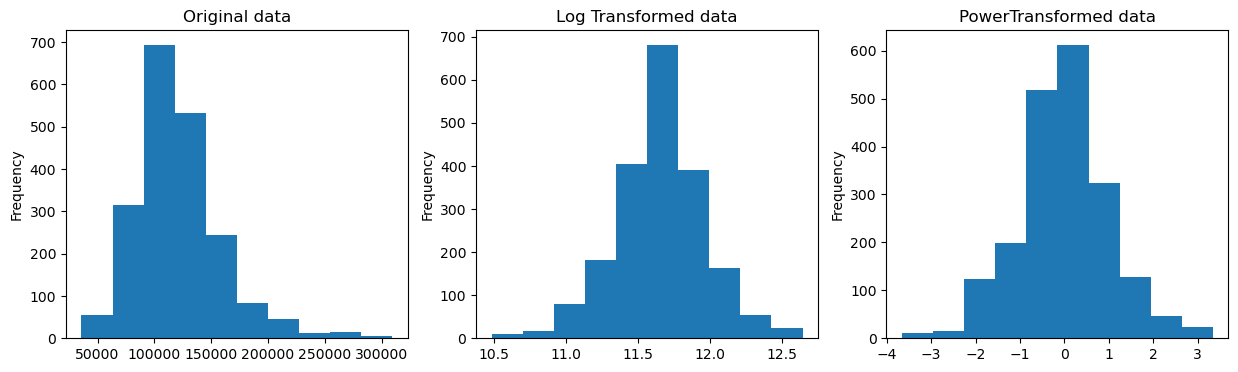

In [40]:
# PowerTransform data
feature = customer_info['Income'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_income = apply_log(customer_info['Income'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
customer_info['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['Income'])

# Plot log transformed data & get metrics
log_transformed_income.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_income)

# Plot power transformed data & get metrics
feature.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [41]:
normality_test(log_transformed_income)

NormaltestResult(statistic=32.357037046565075, pvalue=9.41366371618838e-08)

In [42]:
metrics

,statistic,pvalue
Original data,449.473326,2.500964e-98
Log transform,32.357037,9.413664e-08
PowerTransformer,27.859212,8.921730e-07


O **PowerTransformer** é uma técnica de transformação que busca tornar os dados mais próximos de uma distribuição normal, estabilizando a variância e reduzindo a assimetria. Ele suporta duas abordagens: **Box-Cox**, que exige valores positivos, e **Yeo-Johnson**, que pode ser aplicado a qualquer conjunto de dados. Além disso, a transformação ajusta os dados para média zero e variância unitária, o que pode ser essencial para modelos que assumem normalidade, como **K-Means Clustering**.  

A análise de normalidade dos dados de renda (**Income**) antes da transformação indicou uma forte **não normalidade** ($\text{p-value} ≈ 10^{-98}$), o que levou à aplicação de duas técnicas: **transformação logarítmica** e **PowerTransformer**. Ambas reduziram a assimetria e melhoraram a distribuição, mas os testes de normalidade ainda retornaram valores de p muito baixos ($ ≈ 10^{-8}$ para $\log$ e $10^{-7}$ para **PowerTransformer**), indicando que os dados ainda não seguem perfeitamente uma distribuição normal. Apesar da melhora, pode ser necessário testar outras técnicas, como **padronização (Z-score)**, ou optar por métodos estatísticos que não exigem normalidade.

### Feature: Age

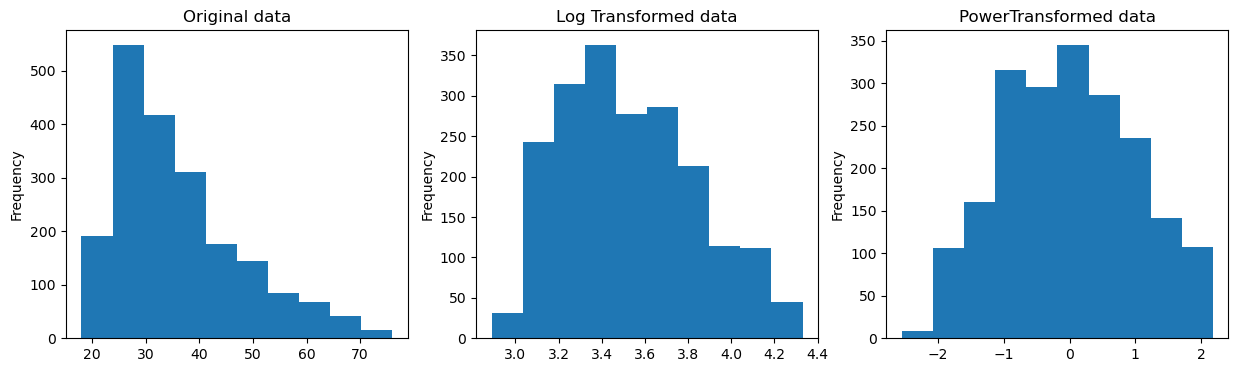

In [43]:
# PowerTransform data
feature2 = customer_info['Age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature2)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(customer_info['Age'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

# Plot original data & get metrics
customer_info['Age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(customer_info['Age'])

# Plot log transformed data & get metrics
log_transformed_age.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_age)

# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature2)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [ ]:
metrics

,statistic,pvalue
Original data,255.475892,3.342834e-56
Log transform,111.094201,7.519703e-25
PowerTransformer,161.196197,9.924088e-36


A variável **Age** (idade) passou por um processo semelhante ao aplicado à variável **Income**, com o objetivo de aproximar seus valores de uma distribuição normal. Inicialmente, o teste de normalidade indicou uma forte **não normalidade** ($p$-value $\approx 3.34 \times 10^{-56}$), confirmando que os dados não seguem uma distribuição normal. Para mitigar esse problema, foram aplicadas duas transformações: **logarítmica** e **PowerTransformer**.  

Os resultados mostram que ambas as transformações reduziram a estatística de teste, indicando uma melhora na distribuição, mas os $p$-values ainda permanecem extremamente baixos ($7.52 \times 10^{-25}$ para log e $9.92 \times 10^{-36}$ para PowerTransformer). Isso sugere que, embora as transformações tenham ajudado a suavizar a distribuição, a normalidade ainda não foi alcançada. Assim, pode ser necessário explorar outras abordagens, como **padronização (Z-score), transformações não lineares mais sofisticadas ou até modelos que não assumem normalidade nos dados**.

### Transformações de características definitivas:
Adicionamos os resultados da seção anterior para nosso DataFrame customer_info. Renomeamos o DataFrame transformado final que contém os atributos finais para usar no modelo. Descartamos as variáveis que não entrarão no modelo, que são 'Income', 'Age' e 'ID'.

In [44]:
customer_info['transf_income'] = feature
customer_info['transf_age']    = log_transformed_age

In [45]:
customer_transformed = customer_info.drop(['Income', 'Age', 'ID'], axis=1)
customer_transformed

,Sex,Marital status,Education,Occupation,Settlement size,transf_income,transf_age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,0.209208,3.850148
1996,1,1,1,1,0,0.051991,3.295837
1997,0,0,0,0,0,-0.948374,3.433987
1998,1,1,1,0,0,-0.545364,3.178054


#### Escala de atributos (MinMaxScaler)

Como há atributos categóricos escalados entre 0 e 1 (recurso 'Sexo'), usaremos o MinMaxScaler do scikit learn para escalar dados entre 0 e 1. Isso é feito para que a escala seja equivalente à do atributo 'Sexo' (todos os valores estarão entre zero e um). Isso é importante para o modelo de agrupamento K-Means, pois ele usa a distância como uma medida de similaridade. Portanto, se não escalarmos os atributos, não obteremos clusters precisos.

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
X = scaler.fit_transform(customer_transformed)

In [48]:
X[0]

array([0.        , 0.        , 0.66666667, 0.5       , 1.        ,
       0.55651051, 0.91249369])

# Modelos de Clusterização

## Clusterização K-Means

K-Means é um algoritmo de clusterização baseado na distância para determinar a similaridade de diferentes pontos. Ele cria clusters atribuindo pontos ao cluster mais próximo deles.

### Selecionando o número correto de clusters

Existem várias maneiras de selecionar o número correto de clusters, mas todas elas são baseadas na quantidade de insights de negócios que obtemos de cada cluster. Não é útil encontrar muitos clusters se não podemos interpretá-los ou não ganhar nada separando-os em diferentes categorias. O número de clusters é uma entrada para o modelo, mas não podemos determinar o número de clusters de antemão. Portanto, uma boa aproximação é usar o método elbow e selecionar o número de grupos que reduz uma métrica a uma quantidade considerável; mais não adicionaria muita informação e menos significaria que a métrica ainda poderia ser melhorada significativamente.

#### Método Elbow (cotovelo)

In [50]:
from sklearn.cluster import KMeans

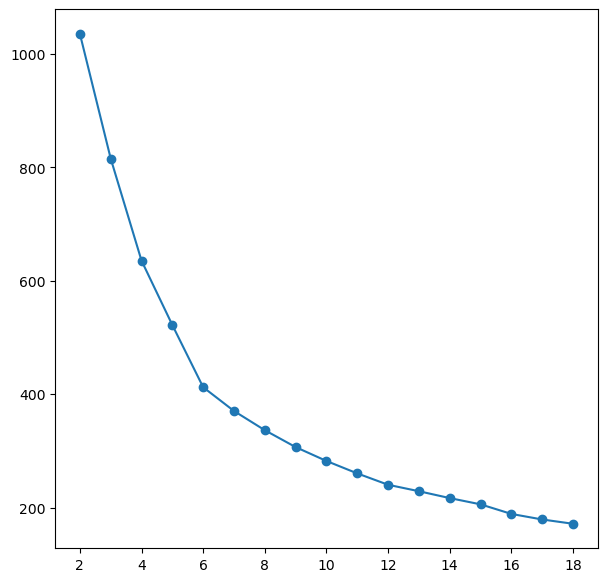

In [51]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, n_init=10, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

Ao executar o loop mostrado acima, notamos que o cotovelo acontece em torno de 6-7 clusters, o que seria uma boa aproximação. A curva não é muito clara e você também pode dizer que 12 é um bom número, mas você deve entender que 12 clusters geralmente são demais, então preferimos perder algumas informações sobre os grupos aos quais nossos clientes pertencem, do que ganhar mais precisão no clustering usado.

Embora tenhamos um resultado um tanto convincente acima, usaremos as pontuações do Silhouette para ver se podemos obter mais insights sobre quantos clusters devemos usar. Veja o procedimento abaixo:

#### Silhouette scores:

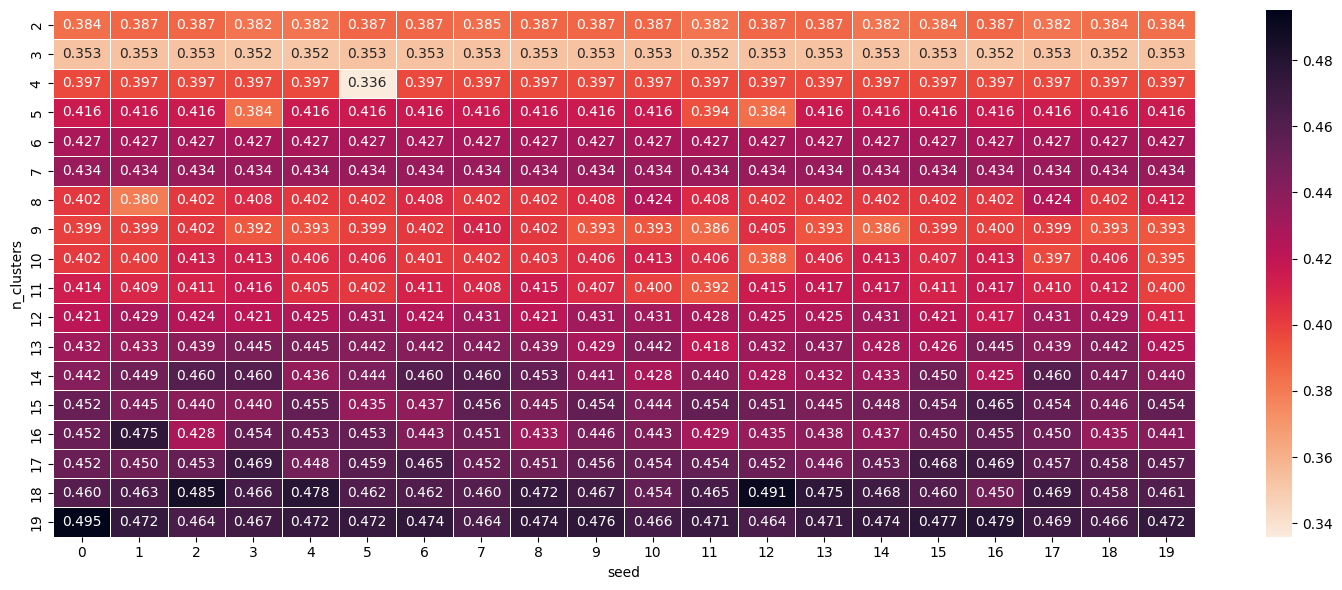

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, n_init=10, random_state=r)
        cluster_labels=clusterer.fit_predict(X)
        silhouette_avg=silhouette_score(X, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

From the graph shown above, we see that there is a spike in the Silhouette score for 7 clusters, which is coherent with the results we got from the elbow method. This results show that choosing either 6 or 7 clusters should result in somewhat separated groups, which is what we are looking for. We see again that more clusters would reduce the metrics even further, but interpretation for such a small quantity of features with so many clusters would be really hard.

We decide to create 6 and 7 clusters and use our business understanding to determine which classification provides more insights about the customers. Another option would be to select 14 or more, which is unrealistic given the size of the dataset.

## Re-running the models for 6 and 7 clusters:

Below we create the models for 6 and 7 clusters using K-Means and try to understand the results. We will use PCA to visualize the data and determine if the 6-7 clusters we selected provide good inter-cluster cohesion and cluster separation. If not, we will re-run this approach with a Density-Based model and see if we get better results.

#### Creating a 3D dataset with PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

#### Applying K-Means with 6 clusters and visualizing the results with PCA decomposition

In [ ]:
kmeans=KMeans(n_clusters=6, n_init=10, random_state=0).fit(X)

We add the labels of each row to the DataFrame so we can make the plotting process simpler. In order to remember that we are talking about a categorical result in the labels columns, we will later convert them to string-types.

In [ ]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
X_pca_df.head()

,X1,X2,X3,Labels
0,0.829143,0.350518,-0.162403,3
1,-0.531854,0.719504,-0.230299,2
2,0.489493,-0.693627,0.175269,0
3,0.712487,-0.027906,-0.049583,3
4,0.718334,-0.036815,-0.052850,3


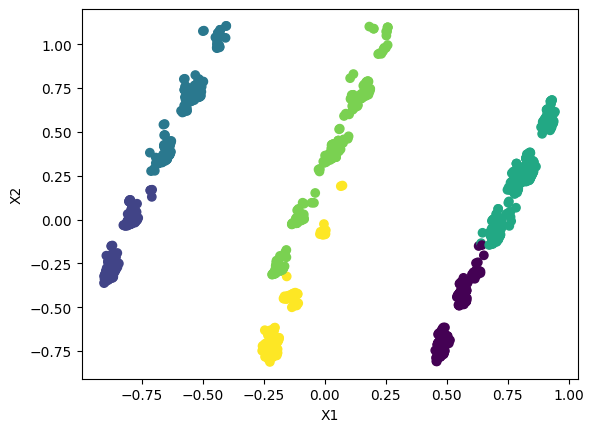

In [ ]:
# @title X1 vs X2

import matplotlib.pyplot as plt
plt.scatter(X_pca_df['X1'], X_pca_df['X2'], c=X_pca_df['Labels'])
plt.xlabel('X1')
_ = plt.ylabel('X2')

<Axes: xlabel='X1', ylabel='X2'>

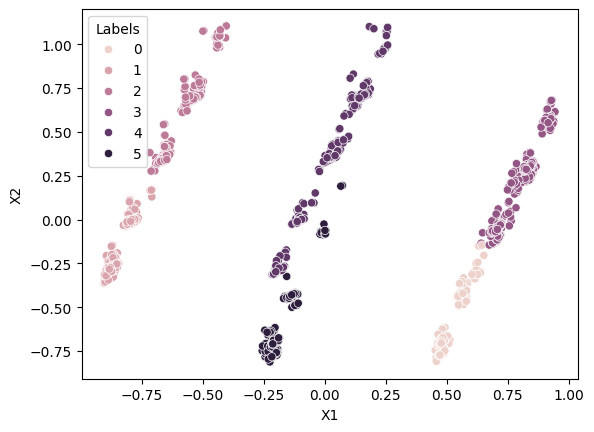

In [ ]:
# @title X1 vs X2 colored by label

sns.scatterplot(data=X_pca_df, x="X1", y="X2", hue="Labels")

In [ ]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

#### Visualization

We have already clustered the data into 6 distinct groups and done PCA to get 3 features out of the 7 we originally had. It is always important to remember that using PCA inherently means a loss of information, so the projections of the data in the new features X1, X2 and X3 can have some overlapping points, but in reality, when using K-Means clustering the border points are clearly defined.

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

We should first notice that the clusters are quite separated and the algorithm seems to be doing the cluster separation well, as the frontiers between clusters seem quite clear.

Now we should create a Results DataFrame that includes the labels and apply filtering methods to infer information about the clusters provided by the K-Means model. Our objective is to define what type of customer is reflected in each cluster!

In [ ]:
results_df = customer_info.drop(['ID', 'transf_income', 'transf_age'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB


## Summary statistics of each cluster

Now let's build a program that calculates statistics for the data for each label. Our aim with this is to have a general sense of the values within each cluster, so we need central tendency statistics that look at the entire dataset we are interested in, like the mean, median, std. dev. and so forth. The .describe() method does precisely that for us. It shows the mean and std. dev., and the 50% column shows the median of the data.

In [ ]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T  # .describe method provides general statistics about the data

Above, we created a dictionary called summary which contains all the central tendency statistics we wanted to know. Min and Max statistics give us an idea of the range of the data, while the mean and median give us the central tendency of the data. Finally, the standard deviation gives us a notion of variance within the data.

### Interpreting results

Now, let's try to interpret the results we got for each cluster with the help of this statistics and our general knowledge of the data. Remember we gathered some information about the data during the data visualization section that may come in handy here. For example, we noticed that 'Age' wasn't a good indicator of separation from the clusters as data points from this feature within the same age range belonged to different categories.

We will use **two strategies to interpret the data points**. The first is using the summary descriptive statistics from the **.describe()** method. This gives us a good general idea of the data within each label, but it's also incomplete, as we don't have an idea of distribution. Therefore, we will make use of the **.hist()** method for DataFrames to add another layer of depth into our analysis with the distribution of the data.

Notice the clusters are not analyzed in order, due to the fact that I've already conducted a quick analysis to make sense of the data.

### Cluster 0

In [ ]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Sex,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Marital status,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age,312.0,37.567308,10.633108,21.0,29.75,36.0,42.00,74.0
Education,312.0,0.737179,0.579524,0.0,0.00,1.0,1.00,2.0
Income,312.0,102566.410256,26584.893960,43684.0,81804.00,103618.5,120396.75,219319.0
Occupation,312.0,0.365385,0.501913,0.0,0.00,0.0,1.00,2.0
Settlement size,312.0,0.060897,0.239526,0.0,0.00,0.0,0.00,1.0
Labels,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


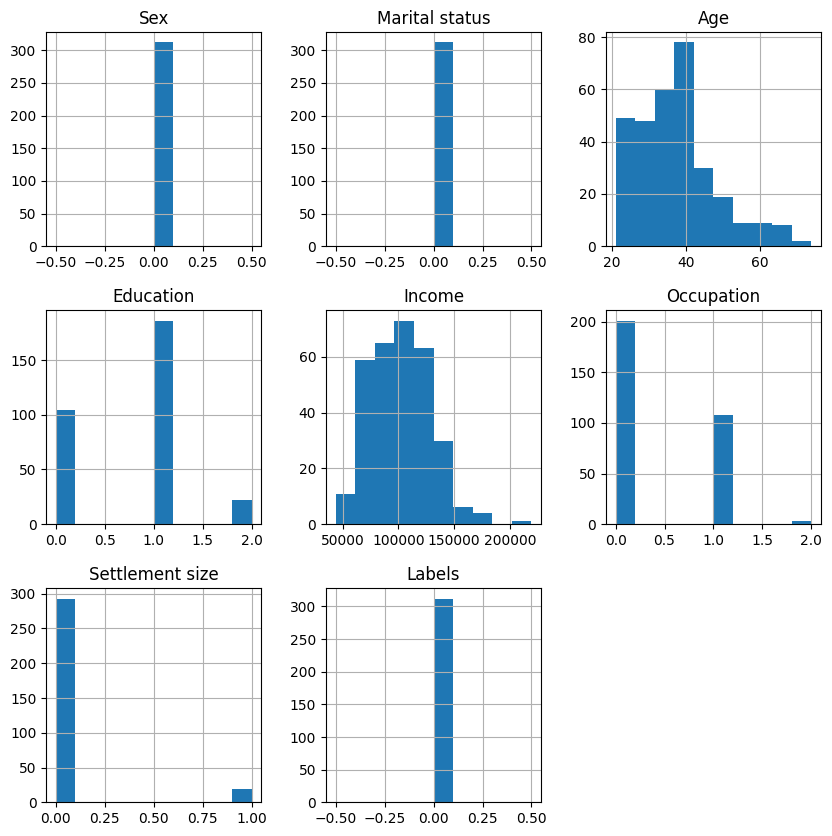

In [ ]:
results_df[results_df['Labels'] == 0].hist(figsize=(10,10));

#### Conclusion Cluster 0:

This cluster groups single men with medium income, generally unemployed who live in small cities. We could be tempted to say that their Age is between 20 and 40 primarily or that education is generally high-school level or below, but as we'll see further into the analysis, this happens in other clusters as well, so we conclude that age or education are good separators of clusters in this dataset for clusters 1 and 3.

### Cluster 3:

In [ ]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
Sex,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,517.0,40.001934,11.945532,20.0,31.0,37.0,47.0,75.0
Education,517.0,0.822050,0.612576,0.0,0.0,1.0,1.0,2.0
Income,517.0,145373.611219,38286.684815,82398.0,119276.0,136323.0,159757.0,287247.0
Occupation,517.0,1.266925,0.484577,0.0,1.0,1.0,2.0,2.0
Settlement size,517.0,1.529981,0.507283,0.0,1.0,2.0,2.0,2.0
Labels,517.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


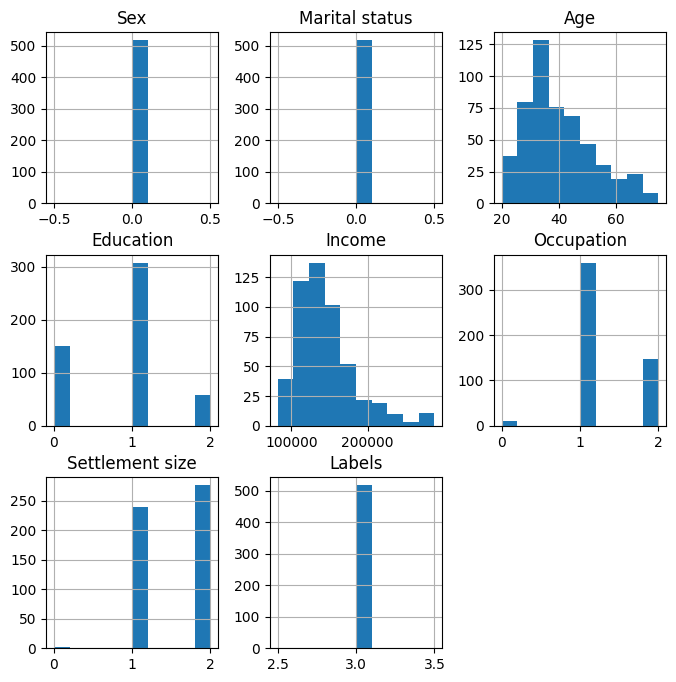

In [ ]:
results_df[results_df['Labels'] == 3].hist(figsize=(8,8));

#### Conclusions Cluster 3:

This cluster is also represented by single men, but with higher income and with management or self-employed occupations. They live in medium to large cities. Education is similar to cluster one, with most being educated up to high-school level or below. Ages seem to be within the same range as cluster one, so they won't be taken into account.

### Cluster 1

In [ ]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Sex,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Marital status,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,430.0,32.416279,10.911221,18.0,25.00,28.5,36.00,71.0
Education,430.0,1.211628,0.467453,1.0,1.00,1.0,1.00,3.0
Income,430.0,102142.332558,25801.373992,35832.0,86281.25,102323.5,120459.25,207262.0
Occupation,430.0,0.427907,0.495352,0.0,0.00,0.0,1.00,1.0
Settlement size,430.0,0.011628,0.107329,0.0,0.00,0.0,0.00,1.0
Labels,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


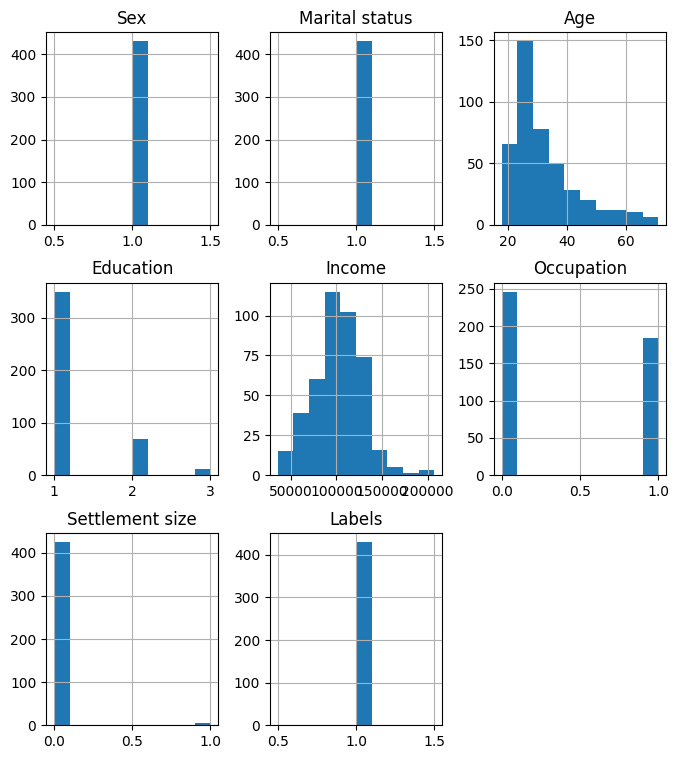

In [ ]:
results_df[results_df['Labels'] == 1].hist(figsize=(8,9));

#### Conclusions Cluster 1

This cluster is represented by non-single women with medium income and high-school or above-level education. They live in small cities and are either unemployed or work as employees/officials. Age is still within the same ranges as before, so we won't take it into account.

### Cluster 2:

In [ ]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Sex,306.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,306.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,306.0,34.284314,13.001925,18.0,25.0,29.0,40.0,76.0
Education,306.0,1.333333,0.572598,1.0,1.0,1.0,2.0,3.0
Income,306.0,136536.702614,38103.456491,88800.0,108455.0,126778.5,155107.0,309364.0
Occupation,306.0,1.183007,0.403881,0.0,1.0,1.0,1.0,2.0
Settlement size,306.0,1.352941,0.511771,0.0,1.0,1.0,2.0,2.0
Labels,306.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


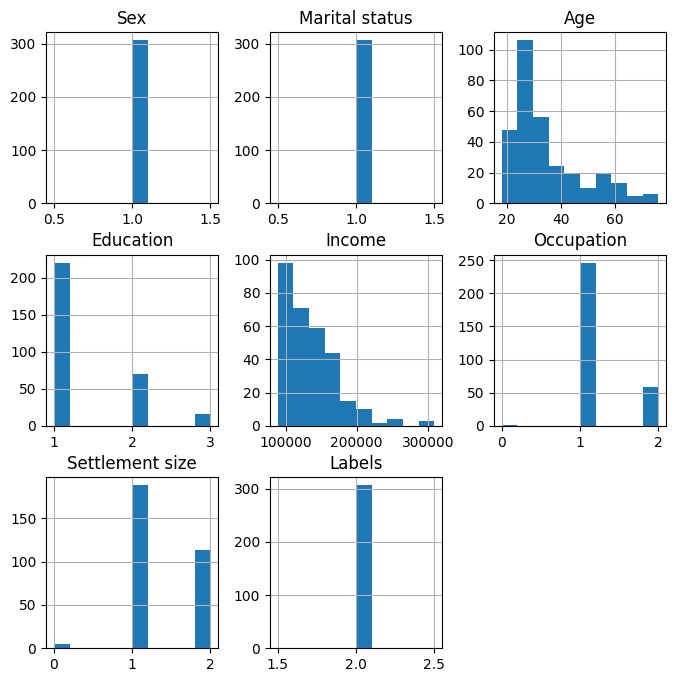

In [ ]:
results_df[results_df['Labels'] == 2].hist(figsize=(8,8));
plt.savefig('cluster4_results')

#### Conclusions Cluster 2:

Cluster 2 is represented by non-single females with high-school or higher-level education, high income who are employed or self-employed. They live in medium to large cities. Again, the distribution of Age is similar in this cluster, so no extra information is obtained from this feature.

You could argue that the age of people in clusters 1 and 2 are generally younger (we use the median of the age to get 28.5 & 29 years in clusters 1 and 2 respectively) than people in clusters 0 and 3, which comparatively have older people in them (using the median again we get 36 and 37 for clusters 0 and 3 respectively). The difference is quite small, but not insignificant, as we'll check in the following cell.

Below we conduct a Hypothesis Test which assumes their data comes from the same sample, and we arrive at the conclusion that the means are significantly different, with a statistical significance of 95%. This means that we can assume that the ages of groups 0 and 3 are significantly different from ages in groups 1 and 2.

Despite this effort, we still don't have a good grasp on the difference between the clusters regarding Age, so we will still ignore this feature.

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

age_cluster_0 = results_df[results_df['Labels'] == 0]['Age']
age_cluster_1 = results_df[results_df['Labels'] == 1]['Age']
age_cluster_2 = results_df[results_df['Labels'] == 2]['Age']
age_cluster_3 = results_df[results_df['Labels'] == 3]['Age']

first_clusters  = [1, 2]
second_clusters = [0, 3]
real_clusters = [age_cluster_0, age_cluster_1, age_cluster_2, age_cluster_3]

for num_clust_1 in first_clusters:
    for num_clust_2 in second_clusters:
        ttest,pval = ttest_ind(real_clusters[num_clust_1], real_clusters[num_clust_2])
        print(f'p-value of {num_clust_1} vs {num_clust_2} is:',pval)
        if pval <0.05:
            print("we reject null hypothesis")
        else:
            print("we accept null hypothesis")


p-value of 1 vs 0 is: 2.494078386464969e-10
we reject null hypothesis
p-value of 1 vs 3 is: 6.465648665856512e-23
we reject null hypothesis
p-value of 2 vs 0 is: 0.0006231854920139259
we reject null hypothesis
p-value of 2 vs 3 is: 2.309500018937428e-10
we reject null hypothesis


### Cluster 4

In [ ]:
summary[4]

,count,mean,std,min,25%,50%,75%,max
Sex,257.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,257.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,257.0,33.968872,10.759035,18.0,26.0,31.0,40.0,67.0
Education,257.0,1.268482,0.501851,1.0,1.0,1.0,1.0,3.0
Income,257.0,122976.723735,38529.241076,62263.0,96769.0,115369.0,146519.0,280570.0
Occupation,257.0,0.933852,0.630834,0.0,1.0,1.0,1.0,2.0
Settlement size,257.0,0.918288,0.827468,0.0,0.0,1.0,2.0,2.0
Labels,257.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


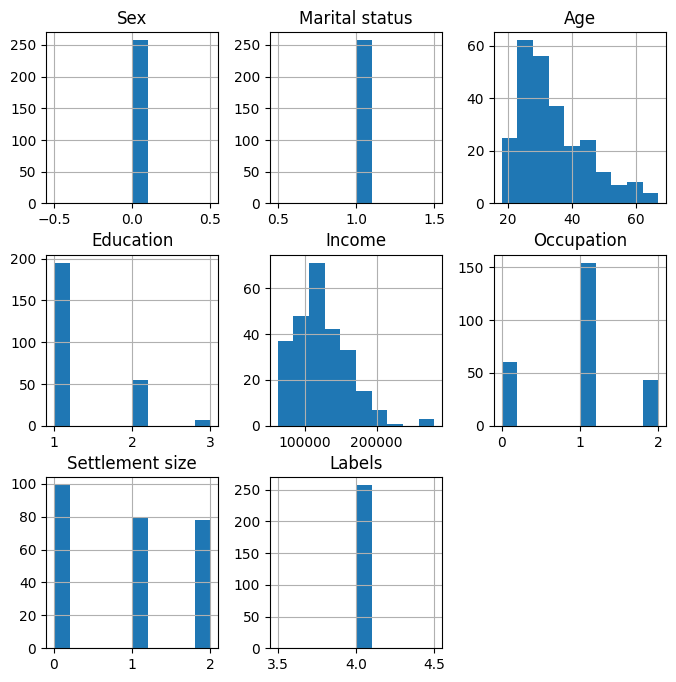

In [ ]:
results_df[results_df['Labels'] == 4].hist(figsize=(8,8));

#### Conclusions Cluster 4:

Cluster 4 is represented by non-single males with high-school or higher level education and low-medium income. They are mostly employed as employees/officials. Note that this customers live in small, medium and large cities equally, so we are not taking it into account in this analysis. Age has the same problem as with other clusters, so it isn't taken into account.

### Cluster 5

In [ ]:
summary[5]

,count,mean,std,min,25%,50%,75%,max
Sex,178.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,178.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,178.0,35.146067,9.755833,19.0,27.0,34.5,41.0,70.0
Education,178.0,0.932584,0.558403,0.0,1.0,1.0,1.0,3.0
Income,178.0,97997.241573,21702.050536,36760.0,80892.5,101511.0,113265.0,143321.0
Occupation,178.0,0.370787,0.507169,0.0,0.0,0.0,1.0,2.0
Settlement size,178.0,0.073034,0.260926,0.0,0.0,0.0,0.0,1.0
Labels,178.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


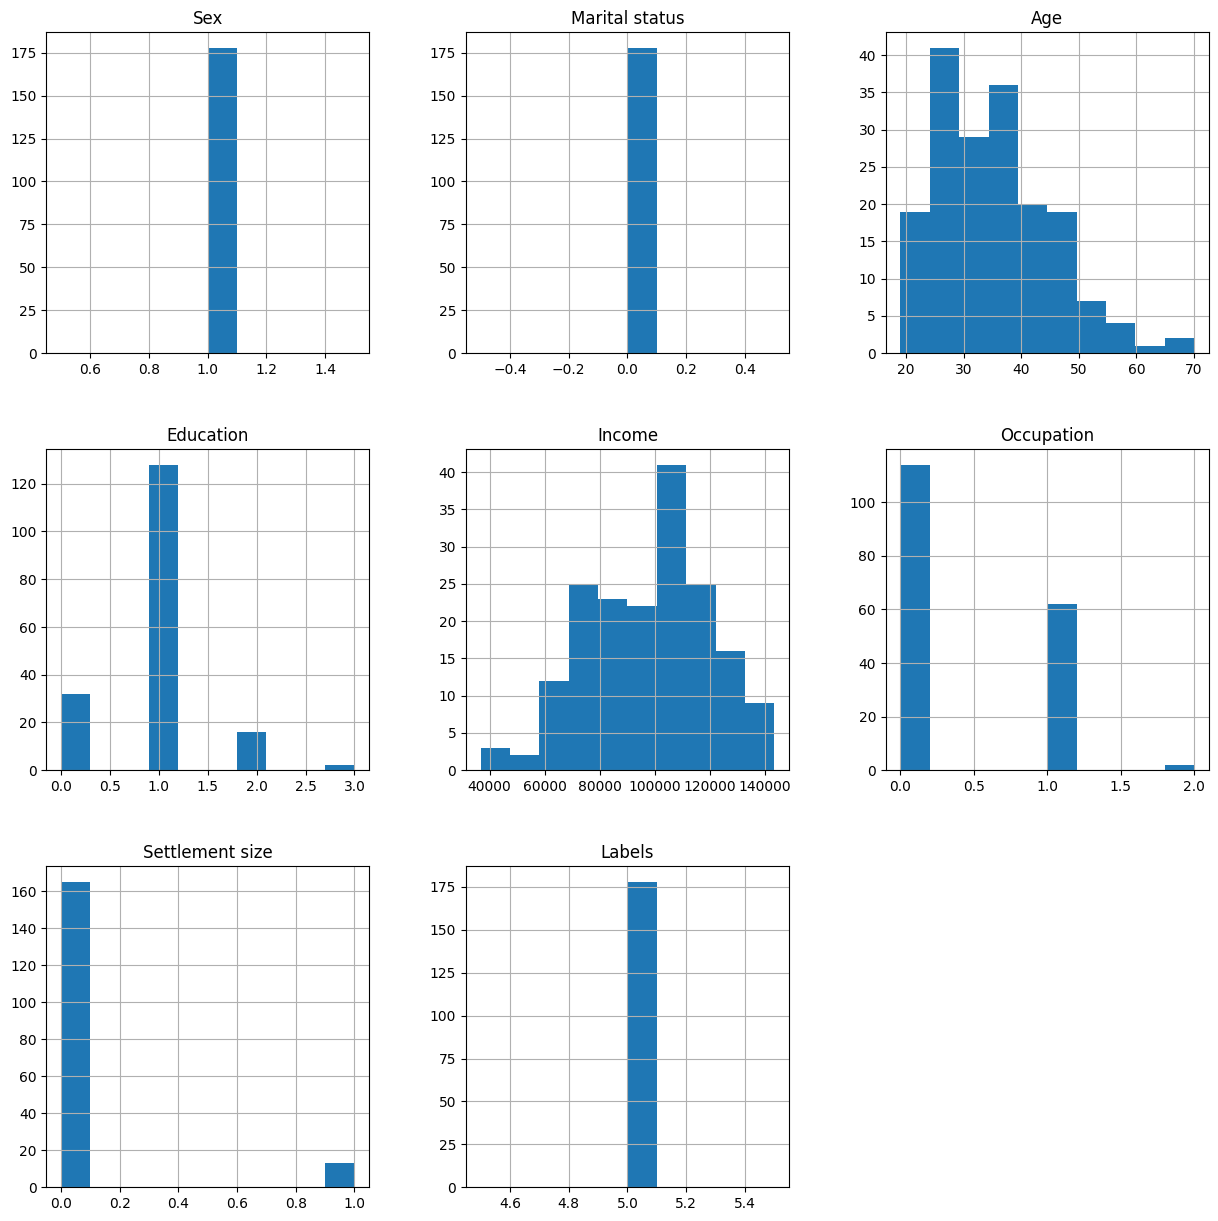

In [ ]:
results_df[results_df['Labels'] == 5].hist(figsize=(15,15));

#### Conclusions Cluster 5:

Cluster 5 is represented by single females of low education. The majority of them have a high-school level education, they live in small cities and are either unemployed or work as employees.

## Alternative ways to interpret clusters:

### Using cluster centroids as a means of understanding the clusters themselves

When we need to get a quick idea of the clusters' statistics by cluster, we can also use the centroids of each cluster, as we will show below. The problem with this method is that it provides a sense of central tendency, but it doesn't tell the whole story. Outliers may be affecting the values of each centroid, and so we have to handle this metric with care.

However, it will be a good measure of accuracy from our already created clusters.

In [ ]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns = results_df.columns[:7], index = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C0,3.885781e-16,1.332268e-15,0.245726,0.182692,0.030449,0.451144,0.484804
C1,1.000000e+00,1.000000e+00,0.403876,0.213953,0.005814,0.448891,0.375836
C2,1.000000e+00,1.000000e+00,0.444444,0.591503,0.676471,0.585119,0.405291
C3,2.553513e-15,1.776357e-15,0.274017,0.633462,0.764990,0.615822,0.524984
C4,-3.885781e-16,1.000000e+00,0.422827,0.466926,0.459144,0.530253,0.409658
C5,1.000000e+00,1.498801e-15,0.310861,0.185393,0.036517,0.433188,0.439125


You can use the information in the centroid to make some sense of the data, but as with the central tendency metrics, you will generally underfit your descriptions, as centroids don't necessarily show the whole picture of the data within each cluster. You can see that gender and marital status of most clusters will be correct, but numerical features, and even some categorical features are harder to interpret. this is why we prefer the Decision Tree method shown below.

### Decision Tree as a method to interpret clusters:

An alternative way to visualize and understand clusters is by way of using decision trees. We can make a decision tree predict the labels of each cluster we have determined, and in doing so the tree will determine splitting points based on the features we pass to the model. In this way, we can create the cluster descriptions based on how the decision tree splits the data.

We will use graphviz as our tree visualization tool. If you haven't downloaded this library, but have matplotlib, there is also an option to plot trees with the matplotlib library, but the visualization is way clearer with graphviz!

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [ ]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)

In [ ]:
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

#### Evaluating the model to make sure interpretations are accurate:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       312
           1       1.00      1.00      1.00       430
           2       1.00      0.99      1.00       306
           3       1.00      0.98      0.99       517
           4       1.00      1.00      1.00       257
           5       1.00      1.00      1.00       178

    accuracy                           0.99      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       0.99      0.99      0.99      2000



The model seems extremely accurate at predicting the values of the classes, so we can expect the split points to be quite accurate as well. We will proceed with the interpretation of the model using this technique.

### Visualization of the Clustering Tree

I'm calling the following tree a 'Clustering Tree' as it aids in defining the clustering algorithm parameters and gives and idea of how the data should be interpreted from our results. The clustering tree returns the results shown below, it is important to note that clusters are named in the same order as they were defined in previous sections.

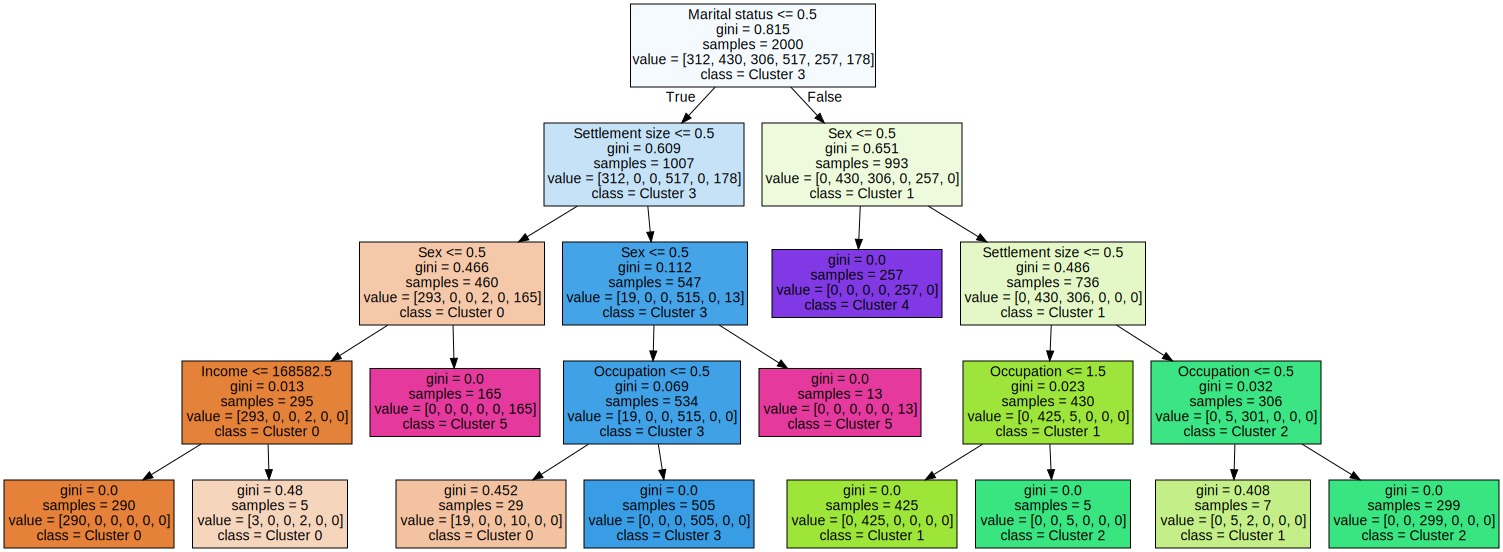

In [ ]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=results_df.columns[:7],
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph
#plt.savefig('DecisionTree.png')

### Clusters according to the Decision Tree:

Below you can see the interpretation of each cluster depending on the features that separate the customers in either group. You can see that even though we used different methods to achieve the grouping descriptions, the results were almost identical. The interesting fact about the Decision Tree is that it can be pruned to take only the most important features into account, and so it provides a much simpler version that can be summarized better, as it is done below. We will stay with the clusters obtained by this method for the reasons explained before.

Notice that there are clusters like number 4, where you only need to know 2 features about the customer to group them into cluster 4. This is a very simple rule to use in practice.

### Summarized Clusters:

Cluster 0 --> Single + Small city + Male + Employed (employee/self-employed) >>> (we ignore Income as both leafs return the Cluster 0 label)

Cluster 1 --> Non-single + Female + small city + unemployed or employees (there are very little cases of medium/big city + unemployed so we discard them)
                                                  
Cluster 2 --> Non-single + Female + medium/large city + management/self-employed (there are very little cases of small city + self-employed so we discard them)

Cluster 3 --> Single + Medium/big city + Male + Employed (employee or self-employed)

Cluster 4 --> Non-single + Males

Cluster 5 --> Single + Small city + Female (there are very little cases of medium/big city + Female so we discard them)